IndexError: list index out of range

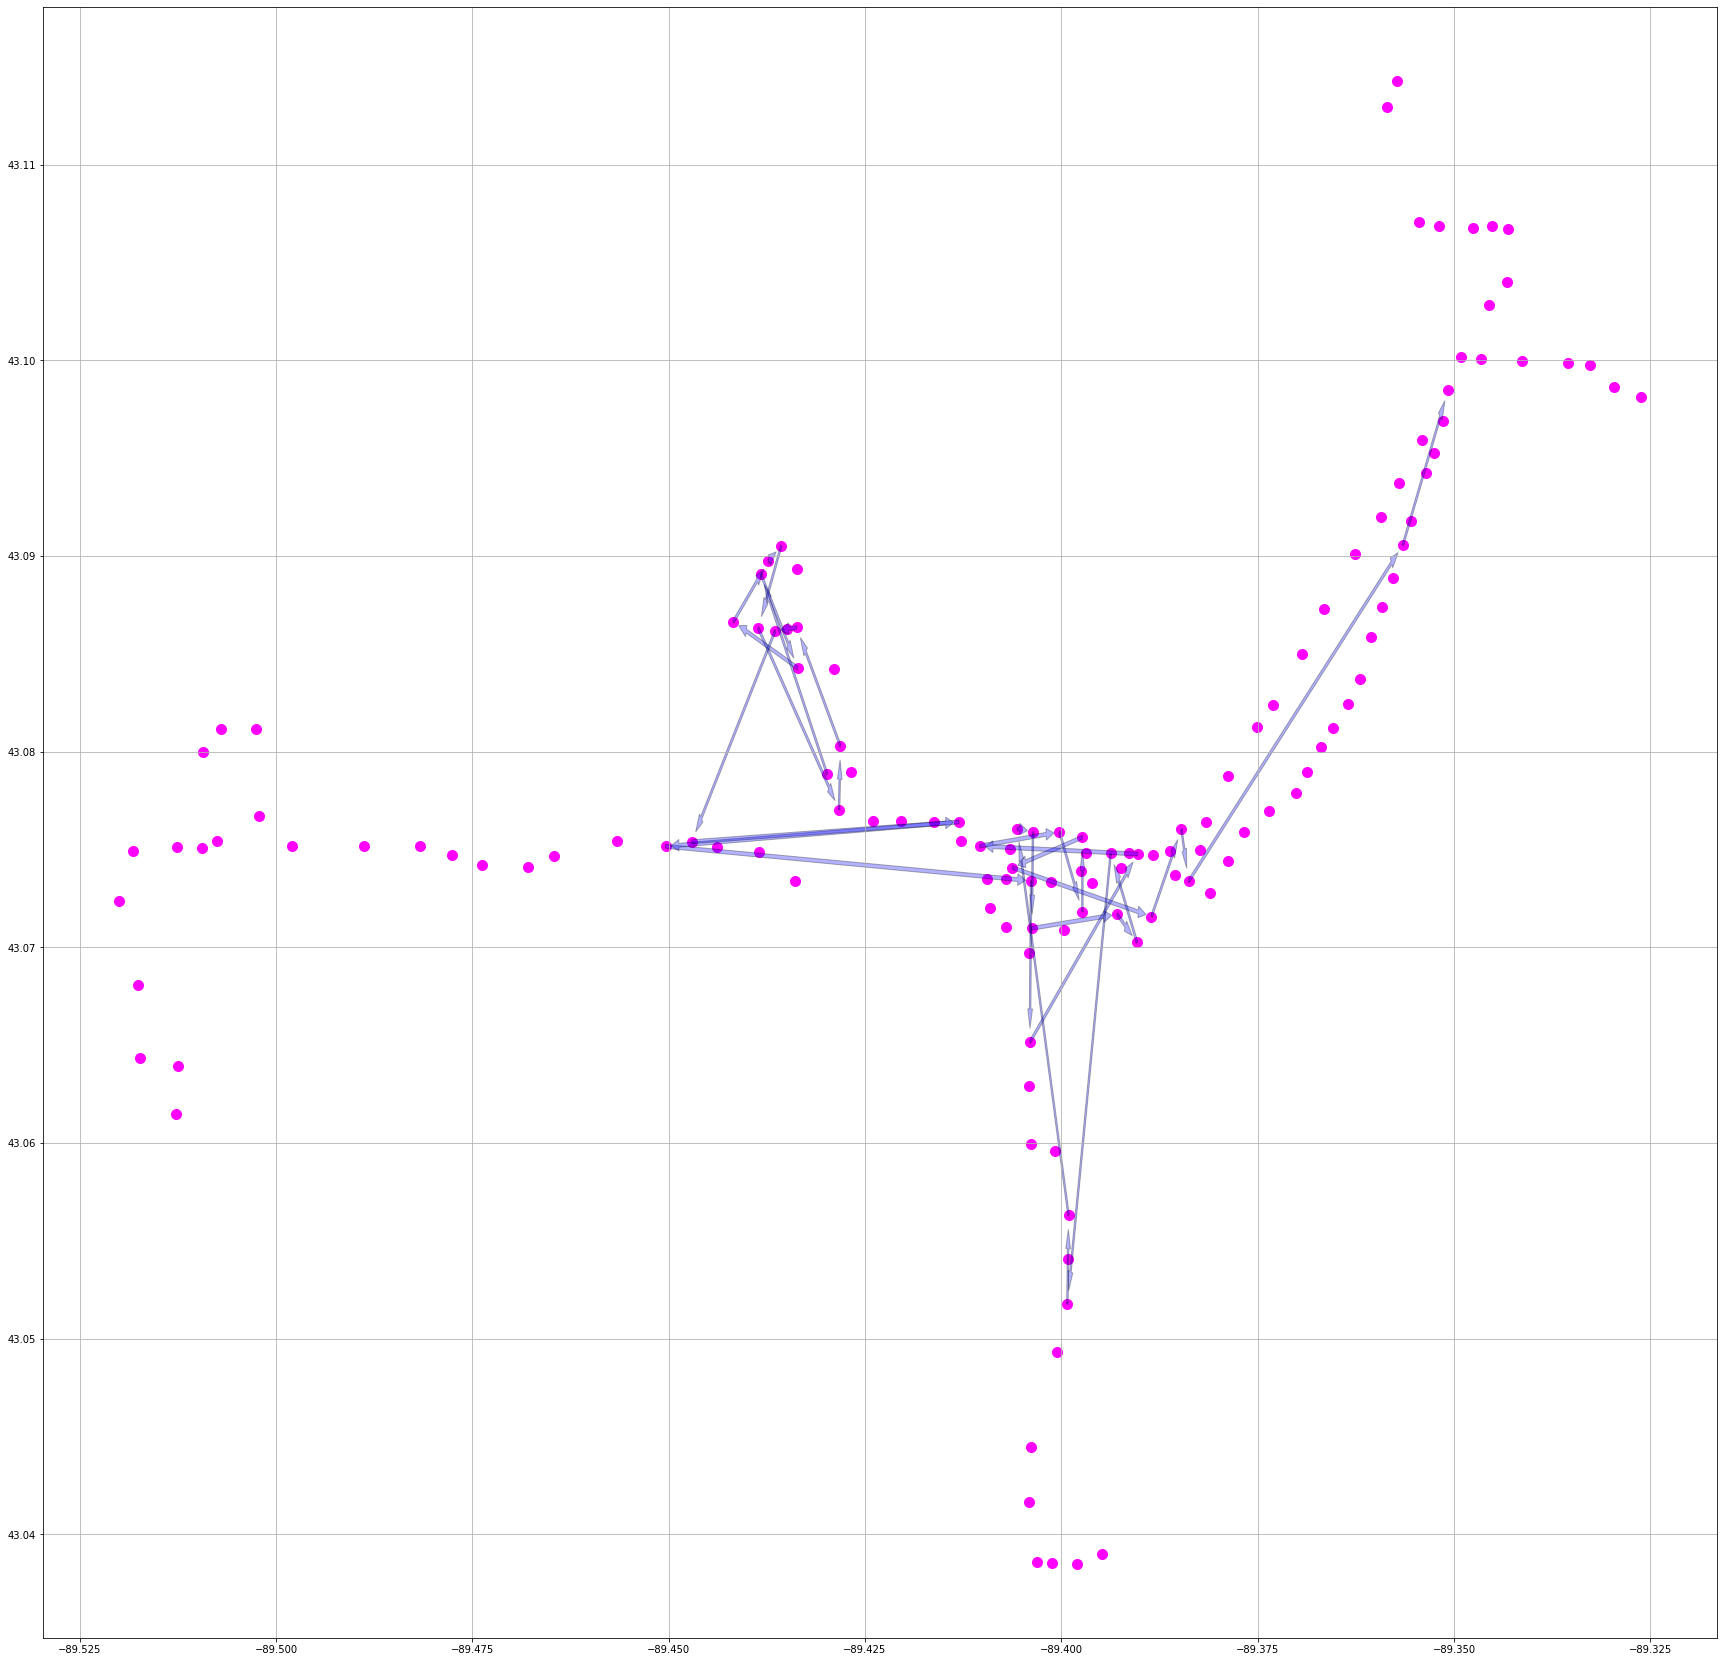

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import math


from shapely.geometry import Point

# %matplotlib inline
state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")
state_df.head()

county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")
county_df.head()

county_df = county_df.query("STATEFP == '55'")
county_df.head()
county_df = county_df.query("COUNTYFP == '025'")
county_df.head()

# fig, gax = plt.subplots(figsize=(10, 10))

# state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
# county_df.plot(ax=gax, edgecolor="black", color="white")



fig, gax = plt.subplots(figsize=(30, 30))


def connectpoints(x,y,p1,p2):
    if p1 == 138 or p2 == 138:
        return
    a = x[p1], y[p1]
    b = x[p2], y[p2]

    head_length = 0.0007

    dx = b[0] - a[0]
    dy = b[1] - a[1]

    vec_ab = [dx,dy]

    vec_ab_magnitude = math.sqrt(dx**2+dy**2)

    dx = dx / vec_ab_magnitude
    dy = dy / vec_ab_magnitude

    vec_ab_magnitude = vec_ab_magnitude - head_length
    # vec_ab_magnitude = vec_ab_magnitude
    
    # arrow base = a
    
    gax.arrow(a[0], a[1], vec_ab_magnitude*dx, vec_ab_magnitude*dy,  head_length=0.001, fc=colors[conn], ec='black', width=0.0002, alpha=0.3, length_includes_head=True)
    

    # plt.scatter(a[0],a[1],color='black')
    # plt.scatter(b[0],b[1],color='black')

    # gax.annotate('', (a[0]-0.4,a[1]),fontsize=14)
    # gax.annotate('', (b[0]+0.3,b[1]),fontsize=14)



df_airports = pd.read_csv('BusStops.csv')
x = df_airports['lat']
y = df_airports['lon']

plt.scatter(x, y, s=100, marker='o',c='fuchsia',)
plt.grid()

colors = ['yellow', 'green', 'blue']

for conn in range(2,5):
    df_flight_paths = pd.read_csv("Connections" + str(conn) + ".csv")

    s, e = df_flight_paths['start_node'], df_flight_paths['end_node']
    
    df_flight_paths.head()
    
    pairs = [(s[i], e[i]) for i in range(len(s))]
    for p in pairs:
        a,b = p
        connectpoints(x,y,a,b)

